# Import data from source
METHOD #1 yfinance
pip install yfinance
Use yfinance API to retrieve company data

In [1]:
import yfinance as yf

def retrieve_csv(name):
    # Example: Get 1-minute intraday data for Apple (AAPL) for 1 day
    data = yf.download(name, interval="5m", period="3d")
    file_name = name+"_intraday.csv"
    data.to_csv(file_name)
    return file_name

csv_name = retrieve_csv("AMD")

C:\Users\chr1s\AppData\Local\Temp\ipykernel_17860\754015289.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(name, interval="5m", period="3d")
[*********************100%***********************]  1 of 1 completed


# Process data from csv files
Use pandas library for processing files

In [2]:
import pandas as pd
df=pd.read_csv("AMD_intraday.csv")
df.head(15)
#df.tail(10)

,Price,Close,High,Low,Open,Volume
0,Ticker,AMD,AMD,AMD,AMD,AMD
1,Datetime,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 13:30:00+00:00,136.6125030517578,137.33999633789062,136.14999389648438,137.3350067138672,2678411
3,2025-07-08 13:35:00+00:00,136.0093994140625,136.6894073486328,135.97000122070312,136.5399932861328,700096
4,2025-07-08 13:40:00+00:00,136.5,136.5800018310547,135.91000366210938,135.96499633789062,594305
5,2025-07-08 13:45:00+00:00,136.68580627441406,136.82000732421875,136.32000732421875,136.5050048828125,584519
6,2025-07-08 13:50:00+00:00,136.85169982910156,136.8699951171875,136.4199981689453,136.63999938964844,439646
7,2025-07-08 13:55:00+00:00,136.4199981689453,136.85000610351562,136.39999389648438,136.83999633789062,445927
8,2025-07-08 14:00:00+00:00,136.75999450683594,137.043701171875,136.2899932861328,136.42999267578125,617772
9,2025-07-08 14:05:00+00:00,136.28579711914062,136.81629943847656,136.23300170898438,136.75999450683594,462868


In [3]:
len(df)


236

In [4]:
df.keys()

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [5]:
price_inputs = df['Close'].to_list()
axis_labels = df['Price'].to_list()
price_inputs = price_inputs[2:]
axis_labels = axis_labels[2:]

print(price_inputs[:10])
print(type(price_inputs[0]))
print(axis_labels[:10])
print(type(axis_labels[0]))
date_format_with_time = "%Y-%m-%d %H:%M:%S"
#axis_labels = [datetime
price_inputs = [float(x) for x in price_inputs]
#nice_axis = [a.split()[1].split('+')[0] for a in axis_labels]
#sum = 0
#for na in nice_axis:
    #print(na)
    #sum+=1
    #if(na == "19:55:00"):
        #break
#print(sum)


['136.6125030517578', '136.0093994140625', '136.5', '136.68580627441406', '136.85169982910156', '136.4199981689453', '136.75999450683594', '136.28579711914062', '136.97000122070312', '137.11000061035156']
<class 'str'>
['2025-07-08 13:30:00+00:00', '2025-07-08 13:35:00+00:00', '2025-07-08 13:40:00+00:00', '2025-07-08 13:45:00+00:00', '2025-07-08 13:50:00+00:00', '2025-07-08 13:55:00+00:00', '2025-07-08 14:00:00+00:00', '2025-07-08 14:05:00+00:00', '2025-07-08 14:10:00+00:00', '2025-07-08 14:15:00+00:00']
<class 'str'>


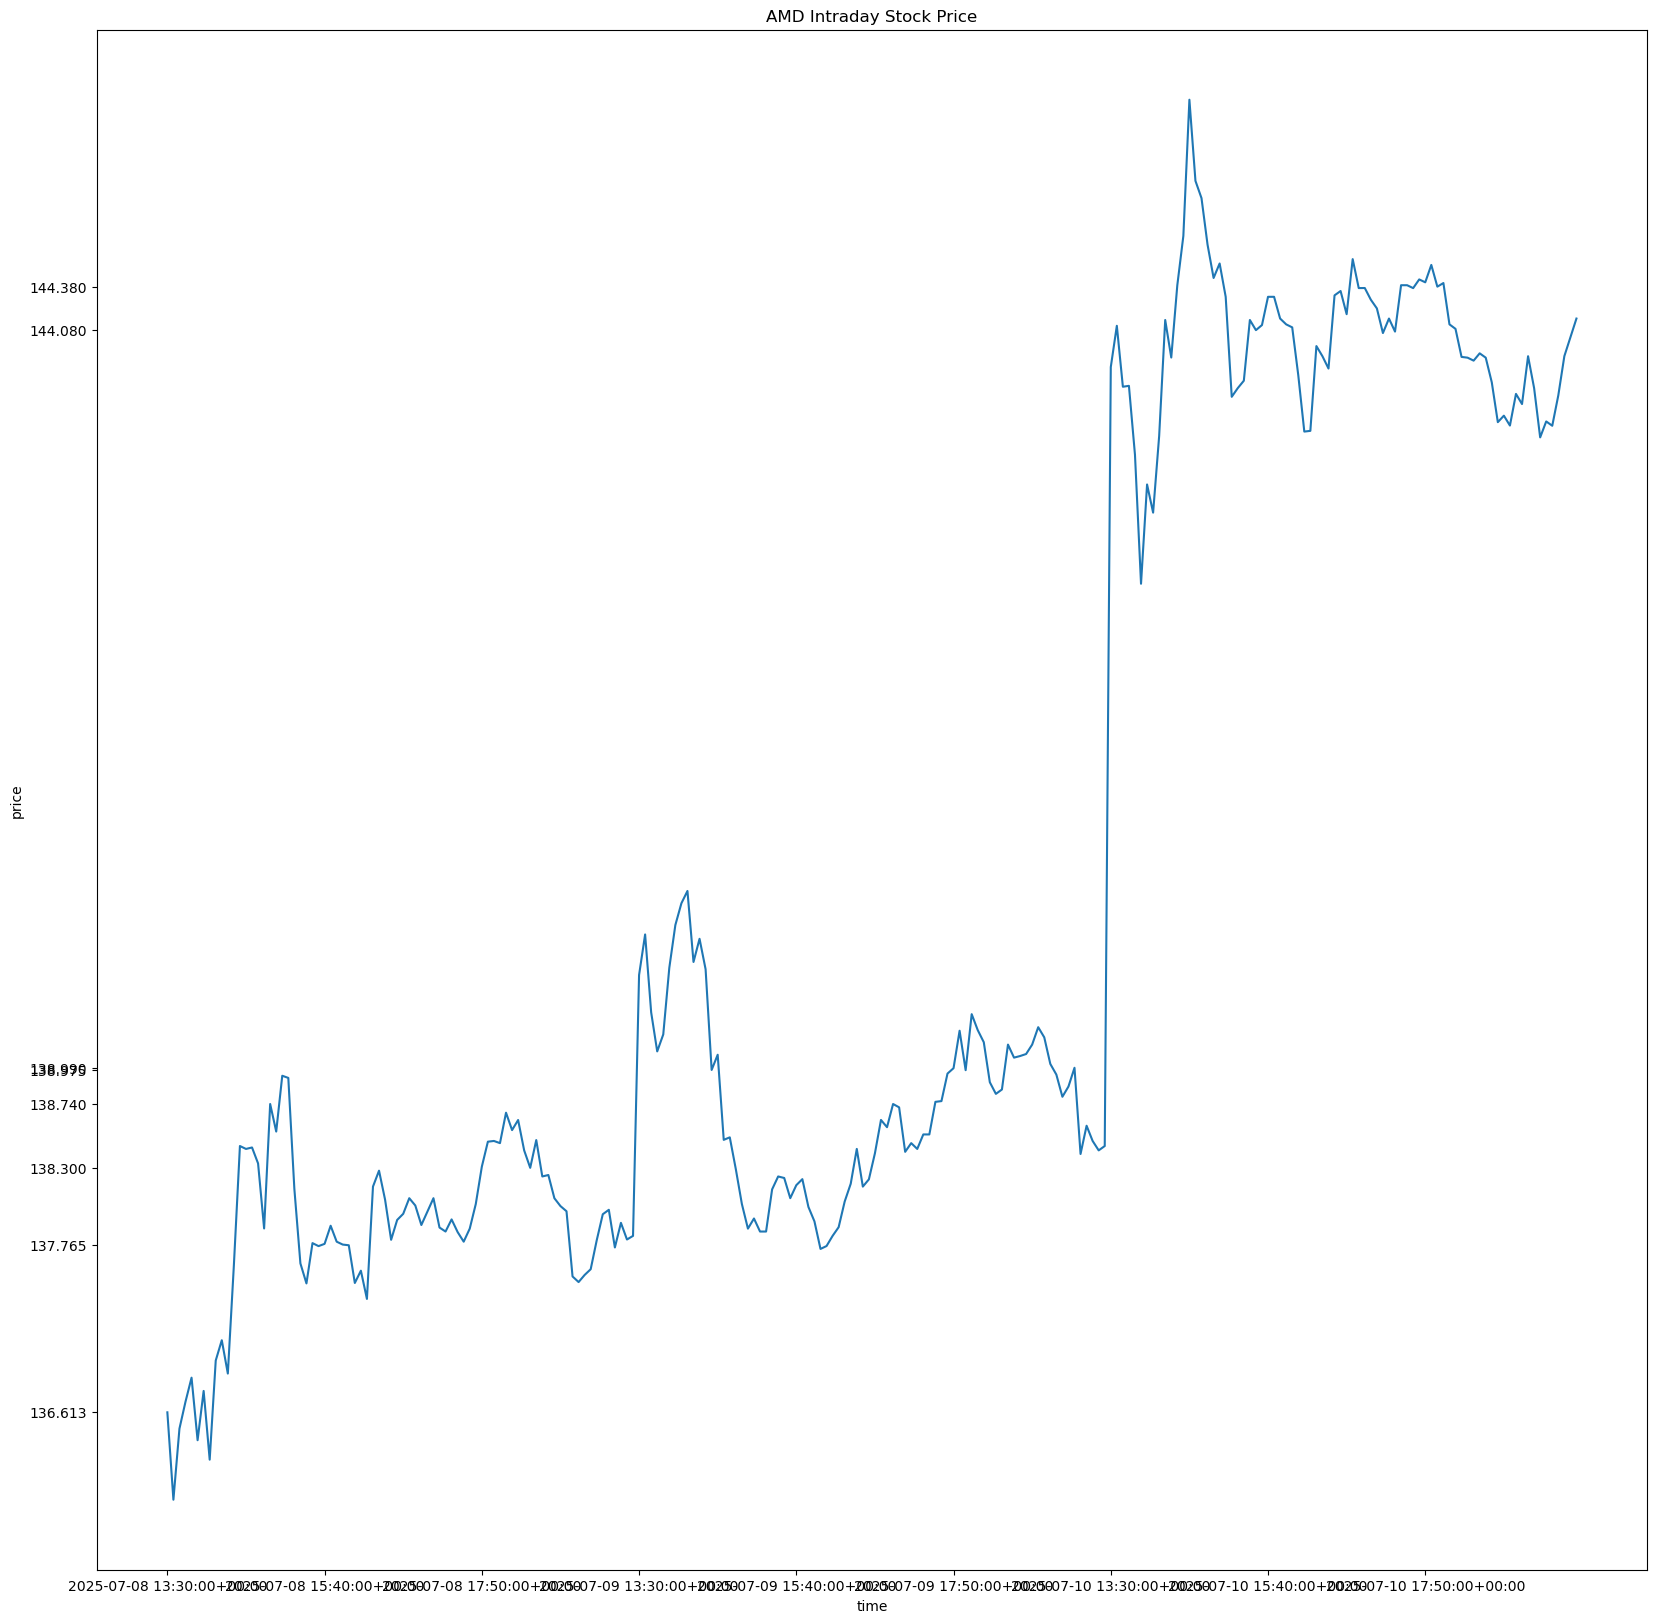

In [6]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 20))
plt.title("AMD Intraday Stock Price")
plt.plot(axis_labels, price_inputs)
plt.xlabel("time")
plt.ylabel("price")
plt.xticks(axis_labels[::26])
plt.yticks(price_inputs[::30])
plt.show()

In [10]:
rnn1 = nn.RNN(input_size=234, hidden_size=128, num_layers=2, nonlinearity='tanh', bias=True, batch_first=True, dropout=0.0, 
              bidirectional=False, device=None, dtype=None)
price_tensor = torch.tensor(price_inputs, dtype=torch.float32)
price_tensor = price_tensor.unsqueeze(0)
price_tensor = price_tensor.unsqueeze(0)
#print(price_inputs[:10])
#print(type(price_inputs[0]))



In [13]:
output,hidden = rnn1(price_tensor)
print(output.shape)  # (1, 1, 128)
print(hidden.shape)  # (2, 1, 128)
fc = nn.Linear(128, 1)  # Predict 1 value from hidden_size=128

prediction = fc(output[:, -1, :])  # Take output at last time step
print(prediction)

torch.Size([1, 1, 128])
torch.Size([2, 1, 128])
tensor([[-0.5234]], grad_fn=<AddmmBackward0>)
